In [ ]:
import numpy as np    # perform mathematical operations
import pandas as pd   # for reading csv
import matplotlib.pyplot as plt   # to plot figures

In [ ]:
trainDf = pd.read_csv("train.csv")    # read train csv file
testDf = pd.read_csv("test.csv")    # read test csv file
trainingSetIndex = len(trainDf)   # calculate length of train dataset

In [ ]:
trainDf.head()    # display the first 5 rows of the dataframe

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
trainDf.dtypes    # returns data type of each column

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Data Cleaning

In [ ]:
trainDf.isnull().sum()    # check for null values in any column

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
combination = trainDf.append(testDf)    # combine train and test data
combination = combination.drop(["Item_Identifier", "Outlet_Identifier"], axis = 1)    # drop 'Item_Identifier' and 'Outlet_Identifier'

combination = combination.fillna(combination.median())  # replacing the null in the ItemWeight

# replacing values in 'Item_Fat_Content'
combination["Item_Fat_Content"] = combination["Item_Fat_Content"].replace({"LF": 0, "reg": 1})
combination["Item_Fat_Content"] = combination["Item_Fat_Content"].replace({"Low Fat": 0, "Regular": 1})
combination["Item_Fat_Content"] = combination["Item_Fat_Content"].replace({"low fat": 0, "Regular": 1})

# determining perishable and non-perishable goods
perishable = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood"]
non_perishable = ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks", "Snack Foods", "Starchy Foods", "Others"]

# converting 'Item_Type' to int
combination["Item_Type"] = combination["Item_Type"].replace(to_replace=perishable, value="perishable")
combination["Item_Type"] = combination["Item_Type"].replace(to_replace=non_perishable, value="non_perishable")
combination["Item_Type"] = combination["Item_Type"].replace({"perishable": 0, "non_perishable": 1})

# converting 'Outlet_Size' to int
combination["Outlet_Size"] = combination["Outlet_Size"].replace({"Small": 0, "High": 1, "Medium": 2, np.nan: 3})

# converting 'Outlet_Location_Type' to int
combination["Outlet_Location_Type"] = combination["Outlet_Location_Type"].replace({"Tier 3": 0, "Tier 2": 1, "Tier 1": 2})

# converting 'Outlet_Type' to int
combination["Outlet_Type"] = combination["Outlet_Type"].replace({"Grocery Store": 0, "Supermarket Type1": 1, "Supermarket Type2": 2, "Supermarket Type3": 3})

In [ ]:
trainDfClean = combination[:trainingSetIndex]   # splitting into test and train dataset
testDfClean = combination[trainingSetIndex:]

In [ ]:
trainDfClean.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,0,249.8092,1999,2,2,1,3735.1380
1,5.92,1,0.019278,1,48.2692,2009,2,0,2,443.4228
2,17.50,0,0.016760,0,141.6180,1999,2,2,1,2097.2700
3,19.20,1,0.000000,0,182.0950,1998,3,0,0,732.3800
4,8.93,0,0.000000,1,53.8614,1987,1,0,1,994.7052


In [ ]:
testDfClean.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,20.750,0,0.007565,1,107.8622,1999,2,2,1,1794.331
1,8.300,1,0.038428,0,87.3198,2007,3,1,1,1794.331
2,14.600,0,0.099575,1,241.7538,1998,3,0,0,1794.331
3,7.315,0,0.015388,1,155.0340,2007,3,1,1,1794.331
4,12.600,1,0.118599,0,234.2300,1985,2,0,3,1794.331


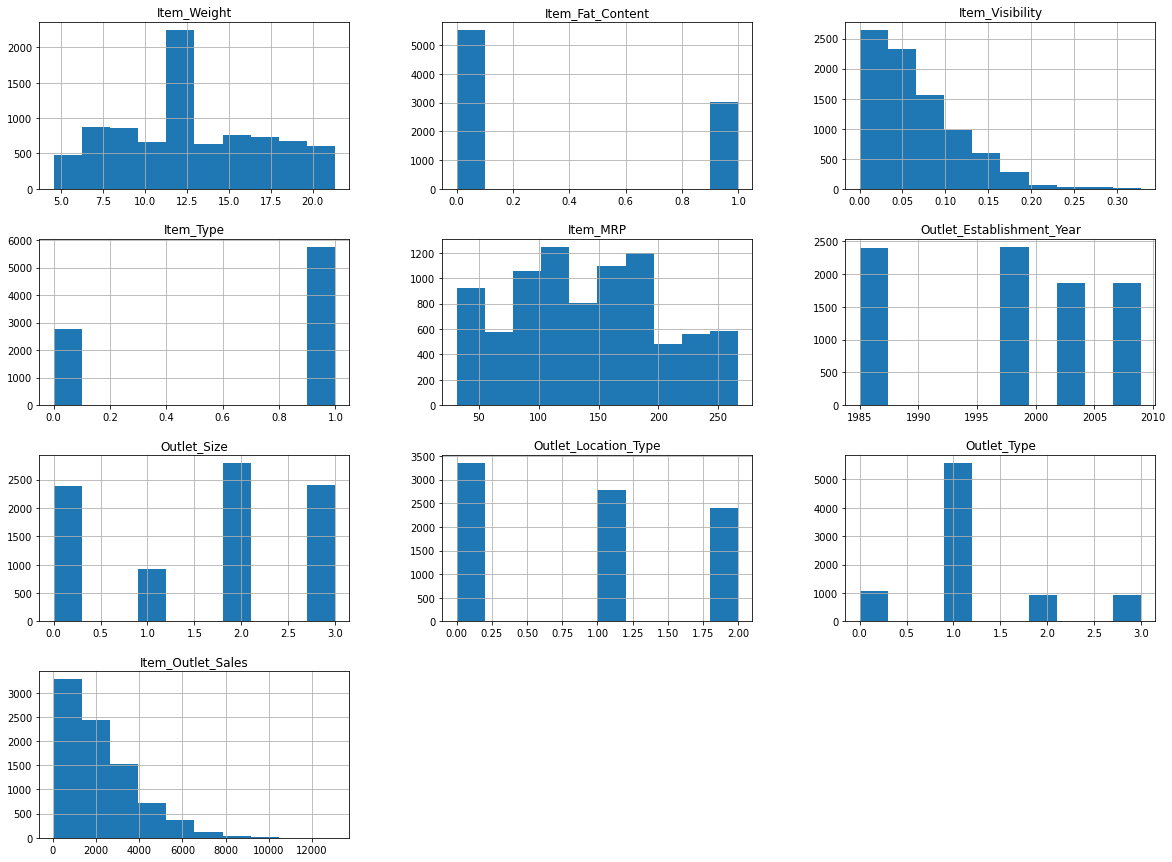

In [ ]:
trainDfClean.hist(figsize=(20,15));   # display histogram

## Split data

In [ ]:
x_train = trainDfClean.drop(["Item_Outlet_Sales"], axis = 1).values   # splitting into test and train data
y_train = trainDfClean["Item_Outlet_Sales"].values
x_test = testDfClean.drop(["Item_Outlet_Sales"], axis = 1).values
y_test = testDfClean["Item_Outlet_Sales"].values

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression   # linear regression model 

In [ ]:
lreg = LinearRegression();    # create linear regression model
lreg.fit(x_train,y_train);    # train the model
y_pred = lreg.predict(x_test);    # predict values

In [ ]:
df = pd.DataFrame(list(zip(y_test, y_pred)), columns =['Actual', 'Predicted'])    # display actual and predicted values in table format
df

,Actual,Predicted
0,1794.331,1849.892148
1,1794.331,1265.288073
2,1794.331,2289.287604
3,1794.331,2292.930401
4,1794.331,5121.067178
...,...,...
5676,1794.331,2402.378965
5677,1794.331,3016.830745
5678,1794.331,1636.170707
5679,1794.331,3306.429360
